In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img=image.load_img("basedata/training/arvind/1.jpg")

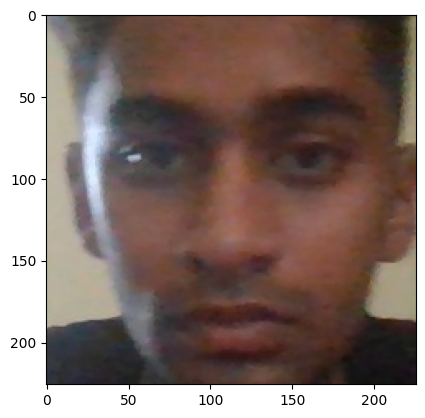

In [3]:
plt.imshow(img)
test_data_dir="basedata/testing"

In [4]:
cv2.imread("basedata/training/arvind/1.jpg")

array([[[146, 143, 145],
        [142, 139, 141],
        [142, 136, 137],
        ...,
        [ 51,  89,  94],
        [ 70, 106, 114],
        [ 77, 110, 119]],

       [[146, 143, 145],
        [143, 141, 141],
        [143, 137, 138],
        ...,
        [ 69, 107, 112],
        [ 81, 117, 125],
        [ 90, 123, 132]],

       [[148, 146, 146],
        [143, 141, 141],
        [141, 135, 136],
        ...,
        [ 78, 114, 120],
        [ 91, 125, 131],
        [ 98, 132, 138]],

       ...,

       [[ 62,  51,  43],
        [ 64,  55,  46],
        [ 62,  54,  47],
        ...,
        [ 26,  20,  25],
        [ 28,  21,  28],
        [ 28,  21,  28]],

       [[ 61,  51,  44],
        [ 62,  52,  45],
        [ 61,  52,  48],
        ...,
        [ 25,  21,  26],
        [ 27,  20,  27],
        [ 28,  20,  30]],

       [[ 59,  48,  44],
        [ 61,  50,  46],
        [ 60,  51,  47],
        ...,
        [ 25,  21,  26],
        [ 27,  19,  29],
        [ 28,  20,  30]]

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('basedata/cropped_faces',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

validation_dataset=train.flow_from_directory('basedata/cropped_faces',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

Found 724 images belonging to 4 classes.
Found 724 images belonging to 4 classes.


In [7]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4,activation='softmax'),



    ]
)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [13]:
model_fit=model.fit(train_dataset,
steps_per_epoch=15,
epochs=15,
validation_data=validation_dataset)

Epoch 1/15
15/15 [==============================] - 7s 425ms/step - loss: 1.4575 - accuracy: 0.4000 - val_loss: 1.2405 - val_accuracy: 0.5566
Epoch 2/15
15/15 [==============================] - 4s 288ms/step - loss: 1.3375 - accuracy: 0.6000 - val_loss: 1.1511 - val_accuracy: 0.8577
Epoch 3/15
15/15 [==============================] - 4s 278ms/step - loss: 1.1841 - accuracy: 0.6444 - val_loss: 1.3607 - val_accuracy: 0.1630
Epoch 4/15
15/15 [==============================] - 4s 271ms/step - loss: 0.8441 - accuracy: 0.6222 - val_loss: 0.6282 - val_accuracy: 0.6547
Epoch 5/15
15/15 [==============================] - 4s 285ms/step - loss: 0.8289 - accuracy: 0.6667 - val_loss: 0.7449 - val_accuracy: 0.8343
Epoch 6/15
15/15 [==============================] - 4s 281ms/step - loss: 0.4433 - accuracy: 0.8444 - val_loss: 0.2668 - val_accuracy: 0.9185
Epoch 7/15
15/15 [==============================] - 4s 279ms/step - loss: 0.2891 - accuracy: 0.8889 - val_loss: 0.5340 - val_accuracy: 0.8743
Epoch 

In [14]:
validation_dataset.class_indices
    

{'arunesh': 0, 'arvind': 1, 'prashanth': 2, 'virat': 3}

In [15]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))  # Adjust the target size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [18]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Directory paths for your original and new dataset
original_dataset_path = 'basedata/training/'
output_dataset_path = 'basedata/cropped_faces'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dataset_path):
    os.makedirs(output_dataset_path)

# Iterate through the classes in the original dataset
for class_name in os.listdir(original_dataset_path):
    class_dir = os.path.join(original_dataset_path, class_name)
    output_class_dir = os.path.join(output_dataset_path, class_name)
    
    # Create the output class directory if it doesn't exist
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)
    
    # Iterate through the images in the class directory
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        output_image_path = os.path.join(output_class_dir, image_file)
        
        # Load the image
        img = cv2.imread(image_path)
        
        # Convert to grayscale for face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        
        for (x, y, w, h) in faces:
            # Crop and save the detected face
            cropped_face = img[y:y+h, x:x+w]
            cv2.imwrite(output_image_path, cropped_face)

KeyboardInterrupt: 

1/1 [==============================] - 0s 22ms/step
[[0. 1. 0. 0.]]


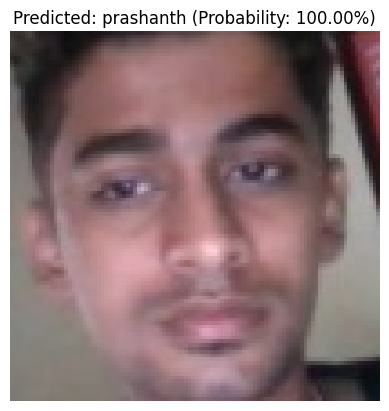

1/1 [==============================] - 0s 24ms/step
[[1. 0. 0. 0.]]


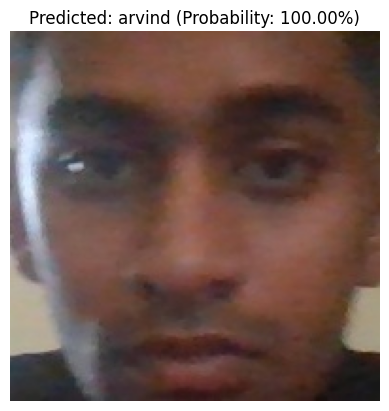

1/1 [==============================] - 0s 23ms/step
[[1. 0. 0. 0.]]


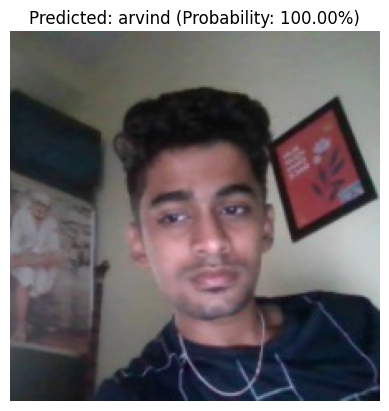

1/1 [==============================] - 0s 25ms/step
[[1. 0. 0. 0.]]


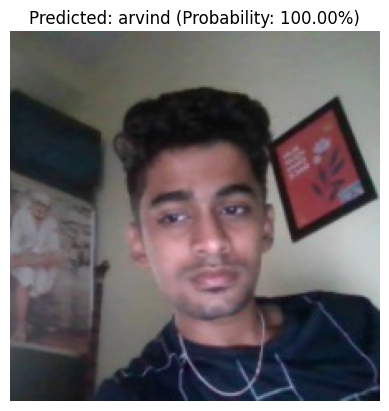

1/1 [==============================] - 0s 34ms/step
[[1. 0. 0. 0.]]


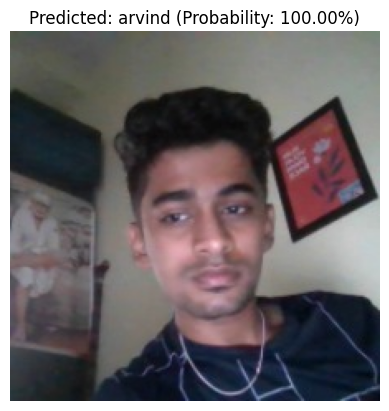

1/1 [==============================] - 0s 23ms/step
[[1. 0. 0. 0.]]


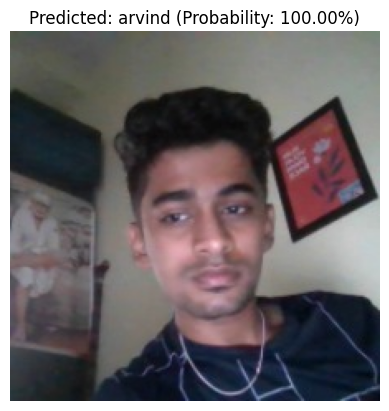

1/1 [==============================] - 0s 22ms/step
[[1. 0. 0. 0.]]


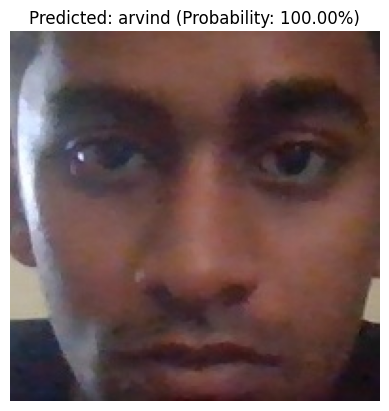

1/1 [==============================] - 0s 31ms/step


IndexError: list index out of range

In [19]:
for image_file in os.listdir(test_data_dir):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(test_data_dir, image_file)
        
        # Preprocess the image
        img = preprocess_image(image_path)
        
        # Predict the label and probability scores
        prediction = model.predict(img)
        
        # Get the predicted class (assuming class indices correspond to 'arvind', 'prashanth', 'virat')
        predicted_class_index = np.argmax(prediction)
        class_names = ['arunesh','arvind', 'prashanth', 'virat']
        predicted_class = class_names[predicted_class_index]
        
        # Get the probability score for the predicted class
        probability = prediction[0][predicted_class_index]
        print(prediction)
        
        # Display the image using Matplotlib
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format for Matplotlib
        
        plt.figure()
        plt.imshow(img_rgb)
        plt.title(f'Predicted: {predicted_class} (Probability: {probability * 100:.2f}%)')
        plt.axis('off')
        plt.show()